%%javascript
// suitable for small screens
nbpresent.mode.tree.set(
    ["app", "theme-manager", "themes", "my-theme"], 
    {
    palette: {
        "blue": { id: "blue", rgb: [0, 153, 204] },
        "black": { id: "black", rgb: [0, 0, 0] },
        "white": { id: "white", rgb: [255, 255, 255] },
        "red": { id: "red", rgb: [240, 32, 32] },
        "gray": { id: "gray", rgb: [128, 128, 128] },
    },
    backgrounds: {
        "my-background": {
            "background-color": "white"
        }
    },
    "text-base": {
        "font-family": "Georgia",
        "font-size": 3
    },
    rules: {
        h1: {
            "font-size": 5.5,
            color: "blue",
            "text-align": "center"
        },
        h2: {
            "font-size": 3,
            color: "blue",
            "text-align": "center"
        },
        h3: {
            "font-size": 3,
            color: "black",
        },
        "ul li": {
            "font-size": 3,
            color: "black"
        },
        "ul li ul li": {
            "font-size": 2.5,
            color: "black"
        },
        "pre": {
            "font-size": 2,            
        },
        "code": {
            "font-size": 2,            
        },
    }
});

# COMP 555 &ndash; BioAlgorithms &ndash; Spring 2017
## **Lecture 2:** Searching for patterns in data

<table>
    <tbody>
    <tr>
    <td>
        <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Patterns01.jpg" width="200px">
    </td>
    <td>
        <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Patterns02.jpg" width="200px">
    </td>
    <td>
        <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/Patterns03.jpg" width="200px">
    </td>
    </tr>
    <tr>
    <td colspan="3" style="text-align: center;">
         From Daniel Becker's <a href="http://www.visual-dna.de/index_en.htm">VisualDNA project</a>
    </td>
    </tr>
    </tbody>
</table>

<span style="font-size: 90%;">*From Chapter 1 of "Bioinformatics Algorithms: An Active Learning Approach," Compeau & Pevzner*</span>
<br>
<p style="text-align: right; clear: right;">1</p>

# <span style="font-size: 95%;">Life &equiv; Reproduction &equiv; Replicating a Genome</span>

One of the most incredible things about DNA is that it provides instructions for replicating itself. Today, rather than looking for those instructions we consider how the process initiates.

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/DNAReplication.png" width="500px" class="centeredImg">
<p style="text-align: right; clear: right;">2</p>

# Where Does Replication Begin?

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/ReplicationOrigin.jpg" width="800px" class="centeredImg">

The DNA replication process begins reliably at a regions of the genome called the *origins of replication* or *oriC*. Today we investigate how these regions are identified?

<p style="text-align: right; clear: right; margin-top: 50px;">3</p>

# Let's Start with Bacterial Genomes

In order to simplify our problem, we first consider Bacterial DNA.

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/BacterialDNA.png" width="300px" class="centeredImg">

Characteristics of Bacterial DNA
 * A Circular primary chromosome
 * Independent, and generally smaller, circular plasmids
 * Simple highly conserved mechanism 
 * Replication is constant (i.e. simple cell cycle)
 
<p style="text-align: right; clear: right;">4</p>

# A cartoon of the DNA replication process

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/DNAReplication.jpg" width="800px" class="centeredImg">
<br><br>
We seek to find the DNA sequence at this point of origin, which is consistent.<br>
<p style="text-align: right; clear: right;">5</p>

# The *oriC* &nbsp;finding Problem

<div>
Given a genome, find the *oriC* regions.
</div>

<table style="border-collapse: collapse; border: none;">
    <tbody>
    <tr style="border-collapse: collapse; border: none;">
        <td width="50%" style="border-collapse: collapse; border: none; vertical-align: top;">
        <b>Biology Approach</b><br>
        <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/BioApproach.png" width="300px">
        <br><br>
        <strong>Advantage:</strong> You can start immediately<br>
        <strong>Disadvantage:</strong> It can take a long time
        </td>
        <td width="50%" style="border-collapse: collapse; border: none; vertical-align: top;">
        <b>Computer Science Approach</b><br>
        <img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/CSApproach.png" width="300px">
        <br><br>
        <strong>Advantage:</strong> It can be fast, and <em>general</em><br>
        <strong>Disadvantage:</strong> Problem is not adequately specified
        </td>
    </tr>
    </tbody>
</table>
<p style="text-align: right; clear: right;">6</p>

# Let's look at an example oriC
<div style="font-size: 85%;">
The replication origin of *Vibrio Cholerae*:

    atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttg
    tatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgactt
    gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgt
    ttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat
    tgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgac
    tcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc

Is there a pattern which might help us to develop an algorithm?

<div style="width: 80%; margin: 0px auto; padding: 10px; background: #ffcccc; font-size: 80%; line-height: 100%; font-family: times;">
<h3 style="margin: 0px 0px;">Vibrio Cholerae</h3>
<h5 style="margin: 0px 20px;">Aquatic organism that causes Cholera</h5>
<div style="font-size: 70%; line-height: 95%;">
<p>An abundant marine and freshwater bacterium that causes <i>Cholera</i>. Vibrio can affect shellfish, finfish, and other marine animals and a number of species are pathogenic for humans. <strong><i>Vibrio cholerae</i></strong> colonizes the mucosal surface of the small intestines of humans where it causes, a severe and sudden onset diarrheal disease.</p> 

<p>One famous outbreak was traced to a contaminated well in London in 1854 by John Snow. Epidemics, which can occur with extreme rapidity, are often associated with conditions of poor sanitation. The disease is highly lethal if untreated. Millions have died over the centuries incuding seven major pandemics between 1817 and today. Six were attributed to the classical biotype, while the 7th, which started in 1961, is associated with this <i>El Tor</i> biotype.</p>
</div>
</div>
</div>
<p style="text-align: right; clear: right;">7</p>

# An Aside: *Accessing Sequence Data?*
<span style="font-size: 80%;">
Genomes are archived as FASTA files, which are text files. Lines beginning with '>' are sequence headers. They are followed by lines of nucleotide sequences.
Here's what one looks like:</span>


In [83]:
!head data/VibrioCholerae.fa

>gi|146313784|gb|CP000626.1| Vibrio cholerae O395 chromosome 1, complete genome
ACAATGAGGTCACTATGTTCGAGCTCTTCAAACCGGCTGCGCATACGCAGCGGCTGCCATCCGATAAGGT
GGACAGCGTCTATTCACGCCTTCGTTGGCAACTTTTCATCGGTATTTTTGTTGGCTATGCAGGCTACTAT
TTGGTTCGTAAGAACTTTAGCTTGGCAATGCCTTACCTGATTGAACAAGGCTTTAGTCGTGGCGATCTGG
GTGTGGCTCTCGGTGCGGTTTCAATCGCGTATGGTCTGTCTAAATTTTTGATGGGGAACGTCTCTGACCG
TTCTAACCCGCGCTACTTTCTGAGTGCAGGTCTACTCCTTTCGGCACTAGTGATGTTCTGCTTCGGCTTT
ATGCCATGGGCAACGGGCAGCATTACTGCGATGTTTATTCTGCTGTTCTTAAACGGCTGGTTCCAAGGCA
TGGGTTGGCCTGCTTGTGGCCGTACTATGGTGCACTGGTGGTCACGCAAAGAGCGTGGTGAGATTGTTTC
GGTCTGGAACGTCGCTCACAACGTCGGTGGTGGTTTGATTGGCCCCATTTTCCTGCTCGGCCTATGGATG
TTTAACGATGATTGGCGCACGGCCTTCTATGTCCCCGCTTTCTTTGCGGTGCTGGTTGCCGTATTTACTT


<br>
<p style="text-align: right; clear: right;">8</p>

# A Python function to parse FASTA files

In [76]:
def loadFasta(filename):
    """ Parses a classically formatted and possibly 
        compressed FASTA file into a list of headers 
        and fragment sequences for each sequence contained"""
    if (filename.endswith(".gz")):
        fp = gzip.open(filename, 'rb')
    else:
        fp = open(filename, 'rb')
    # split at headers
    data = fp.read().split('>')
    fp.close()
    # ignore whatever appears before the 1st header
    data.pop(0)     
    headers = []
    sequences = []
    for sequence in data:
        lines = sequence.split('\n')
        headers.append(lines.pop(0))
        # add an extra "+" to make string "1-referenced"
        sequences.append('+' + ''.join(lines))
    return (headers, sequences)

<p style="text-align: right; clear: right;">9</p>

# Example Usage

In [84]:
header, seq = loadFasta("data/VibrioCholerae.fa")

for i in xrange(len(header)):
    print header[i]
    print len(seq[i])-1, "bases", seq[i][:30], "...", seq[i][-30:]
    print

genome = seq[0]
print "oriC:"
OriCStart = 151887
oriC = genome[OriCStart:OriCStart+540]
for i in xrange(9):
    print "    %s" % oriC[60*i:60*(i+1)].lower()

gi|146313784|gb|CP000626.1| Vibrio cholerae O395 chromosome 1, complete genome
1108250 bases +ACAATGAGGTCACTATGTTCGAGCTCTTC ... CCGATAGTAGAGGTTTATACCATCGCAAAA

gi|147673035|ref|NC_009457.1| Vibrio cholerae O395 chromosome 2, complete genome
3024069 bases +GTTCGCCAGAGCGGTTTTTGACTAGCTTG ... TTTCTGGGTTAAACAGATACTCGGGGCTGG

oriC:
    atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaac
    ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca
    cggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgactt
    gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt
    acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga
    tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat
    tgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaag
    atcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtt
    tccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc


* Outputs the header, length, the 1<sup>st</sup> 30 characters, and last 30 characters of each sequence in the file
    - Note the addition of a "+" as first character
    - Why might their be multiple sequences in a file?
    
* Then it outputs a subsequence on the first sequence
<p style="text-align: right; clear: right;">10</p>

# Looking for Interesting Patterns
&bullet; So let's look at our example *oriC* region to see if we can find any *interesting* patterns<br>
&bullet; Still not sure what *"interesting"* &nbsp;means yet<br>
&bullet; So let's consider **every** pattern of a given length, *k*

A new *well-specified* problem: Find the frequency of all subsequences of length k, *k-mers*
<pre><code style="font-size: 120%">
    atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaac<span style="color: #48f;">
    atca     caacg     ttctaa     atcaagg     acacagtt
     tcaa     aacgt     tctaag     tcaaggt     cacagttt
      caat     acgta     ctaagc     caaggtg     acagttta
       aatg     cgtaa     taagca     aaggtgc     cagtttat
        atga     gtaag     aagcat     aggtgct     agtttatc
         tgat     taagc     agcatg     ggtgctc     gtttatcc</span>
       4-mers    5-mers     6-mers      7-mers       8-mers
</code></pre>

&bullet; Let's count the occurence of every k-mer in a sequence, given a value for k.
<p style="text-align: right; clear: right;">11</p>

# Code for counting k-mers
In a string of length *N*, there are *N-k+1*, substrings of length *k*

In [78]:
def kmerFreq(k, sequence):
    """ returns the count of all k-mers in sequence as a dictionary"""
    kmerCount = {}
    for i in xrange(len(sequence)-k+1):
        kmer = sequence[i:i+k]
        kmerCount[kmer] = kmerCount.get(kmer,0)+1
    return kmerCount

print kmerFreq(3, "TAGACAT")
print kmerFreq(3, "missmississippi")

{'ACA': 1, 'TAG': 1, 'GAC': 1, 'AGA': 1, 'CAT': 1}
{'sis': 1, 'sip': 1, 'iss': 3, 'ppi': 1, 'ssm': 1, 'ipp': 1, 'ssi': 2, 'smi': 1, 'mis': 2}


<p style="text-align: right; clear: right;">12</p>

# An exhaustive scan for patterns
* Is there some obvious pattern?
* Let's consider a range of "K" values

In [79]:
def mostFreqKmer(start, end, sequence):
    for k in xrange(start,end):
        kmerCounts = kmerFreq(k,sequence).items()
        kmerCounts = sorted(kmerCounts,reverse=True,key=lambda tup: tup[1])
        mostFreq = kmerCounts[0:5] 
        print k, mostFreq

mostFreqKmer(1,10,oriC)

1 [('T', 174), ('A', 136), ('C', 122), ('G', 108)]
2 [('TT', 55), ('AT', 54), ('TC', 48), ('GA', 47), ('TG', 47)]
3 [('TGA', 25), ('ATC', 21), ('GAT', 21), ('CTT', 17), ('TCA', 17)]
4 [('ATGA', 12), ('ATCA', 11), ('TGAT', 11), ('GATC', 10), ('CTTG', 9)]
5 [('GATCA', 8), ('TGATC', 8), ('ATGAT', 7), ('TCTTG', 6), ('ATCAA', 6)]
6 [('TGATCA', 8), ('ATGATC', 5), ('ATCAAG', 4), ('CTCTTG', 4), ('GATCAT', 4)]
7 [('ATGATCA', 5), ('TGATCAA', 4), ('TGATCAT', 4), ('TCTTGAT', 3), ('TTGATCA', 3)]
8 [('ATGATCAA', 4), ('TCTTGATC', 3), ('CTCTTGAT', 3), ('TTGATCAT', 3), ('TGATCAAG', 3)]
9 [('CTTGATCAT', 3), ('TCTTGATCA', 3), ('CTCTTGATC', 3), ('ATGATCAAG', 3), ('TTGATCATC', 2)]


<p style="text-align: right; clear: right;">13</p>


# Examine the result
Are two 5-mers repeated 8 times interesting? Surprizing?
How about four 9-mers repeated 3 times?

<p style="text-align: right; clear: right;">14</p>

# k-mer Likelihoods
Under the assumption that all k-mers are equally likely, we'd expect a given k-mer to occur:

$$p(k) = \frac{1}{4^k}$$

So we expect a specific 5-mer once per 1024 bases, so having 8 in 535 (540 - 5) bases is more likely than expected. We also expect a specific 9-mer once per 262,144 bases, so having 3 in 531 (540 - 9) is *much* more than expected.

Moreover, is their any relationship between the 9-mers <code><span style="color: green; font-weight: bold;">ATGATCAAG</span></code> and <code><span style="color: red; font-weight: bold;">CTTGATCAT</span></code>?

<code style="font-size: 75%; line-height: 80%;"><pre>
    atcaatgatcaacgtaagcttctaagc<span style="color: green; font-weight: bold;">ATGATCAAG</span>gtgctcacacagtttatccacaac
    ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca
    cggaaag<span style="color: green; font-weight: bold;">ATGATCAAG</span>agaggatgatttcttggccatatcgcaatgaatacttgtgactt
    gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt
    acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga
    tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat
    tgataatgaatttacatgcttccgcgacgatttacct<span style="color: red; font-weight: bold;">CTTGATCAT</span>cgatccgattgaag
    atcttcaattgttaattctcttgcctcgactcatagccatgatgagct<span style="color: red; font-weight: bold;">CTTGATCAT</span>gtt
    tccttaaccctctattttttacggaaga<span style="color: green; font-weight: bold;">ATGATCAAG</span>ctgctgct<span style="color: red; font-weight: bold;">CTTGATCAT</span>cgtttc
</pre></code>
<p style="text-align: right; clear: right;">15</p>

# Any Biological Insights to Guide us?
<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/InitiationOfReplication.png" width="350" style="float: right; clear: right; margin: 0px 25px;">
&bullet;&nbsp;Replication is performed by a DNA polymerase, and the initiation of replication is mediated by a protein called <i>DnaA</i>.

&bullet;&nbsp;<i>DnaA</i> binds to short (&approx; 9 nucleotides long) segments within the replication origin known as a <i>DnaA</i> box (&approx; 500 bases).

&bullet;&nbsp;A <i>DnaA</i> box is a signal telling <i>DnaA</i> to “bind here!”

&bullet;&nbsp;<i>DnaA</i> can bind to either strand. Thus, both the <i>DnaA</i> box <strong>and its reverse-complement</strong> are equal targets.

&bullet;&nbsp;For reliablity <i>Life</i> wants to see multiple nearby <i>DnaA</i> boxes.

&bullet;&nbsp;Sequences used by <i>DnaA</i> tend to be "AT-rich" (rich in adenine and thymine bases), because A-T base pairs have two hydrogen bonds (rather than the three formed in a C-G pair) which makes them easier to unzip. (Recall A-T was the second most common dimer with 54 after T-T with 55)

&bullet;&nbsp;Once the origin has been located, these initiators recruit other proteins and form the pre-replication complex, which unzips the double-stranded DNA.
<p style="text-align: right; clear: right;">16</p>

# Do these Patterns Generalize?
Let's consider the *OriC* region of another bacteria *Thermotoga petrophila*

    aactctatacctcctttttgtcgaatttgtgtgatttatagagaaaatcttattaactgaaactaaaatggtaggtttggtggtaggttt
    tgtgtacattttgtagtatctgatttttaattacataccgtatattgtattaaattgacgaacaattgcatggaattgaatatatgcaaa
    acaaacctaccaccaaactctgtattgaccattttaggacaacttcagggtggtaggtttctgaagctctcatcaatagactattttagt
    ctttacaaacaatattaccgttcagattcaagattctacaacgctgttttaatgggcgttgcagaaaacttaccacctaaaatccagtat
    ccaagccgatttcagagaaacctaccacttacctaccacttacctaccacccgggtggtaagttgcagacattattaaaaacctcatcag
    aagcttgttcaaaaatttcaatactcgaaacctaccacctgcgtcccctattatttactactactaataatagcagtataattgatctga
    aaagaggtggtaaaaaa

The most frequent 9-mers are: [(<code>ACCTACCAC</code>,5), (<code>GGTAGGTTT</code>,3), (<code>CCTACCACC</code>,3), (<code>AACCTACCA</code>,3), (<code>TGGTAGGTT</code>,3), (<code>AAACCTACC</code>,3)]

There is no occurence of the patterns <code><span style="color: green; font-weight: bold;">ATGATCAAG</span></code> and <code><span style="color: red; font-weight: bold;">CTTGATCAT</span></code>

Thus, it appears that different genomes have different <i>DnaA</i> box patterns. Let's go back to the drawing board. By the way, the <i>DnaA</i> box pattern of *Thermotoga petrophila* is:

<pre><code>
                    <span style="color: green; font-weight: bold;">CCTACCACC</span>
                    |||||||||
                    <span style="color: red; font-weight: bold;">GGATGGTGG</span>
</code></pre>
<p style="text-align: right; clear: right;">17</p>

# A New Strategy

* Our previous strategy was to find frequent words in oriC region as candidate DnaA boxes, as if

<p style="text-align: center; font-size: 140%;">replication origin &rarr; frequent words</p>

* Suppose that we reverse our approach, we use ***clumps*** of frequent words to infer the replication origin, testing if

<p style="text-align: center; font-size: 140%;">nearby frequent words &rarr; replication origin</p>

* We can apply this approach to find candidate <i>DnaA</i> boxes.

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/kmerClumps.png" width="500px" class="centerImg">

<p style="text-align: right; clear: right;">18</p>

# What is a Clump?

We have an initition of what is meant by a *clump* of k-mers, but in order to define an algorithm we will need more precise definitons.

<dl style="margin: 20px 30px;">
    <dt><b>Formal Definition:</b></dt>
    <dd style="margin-left: 30px;">A k-mer forms an (L, t)-clump inside Genome if there is a short (length L) interval of Genome in which it appears many (at least t) times.</dd>
    <br>
    <dt><b>Clump Finding Problem:</b></dt>
    <dd style="margin-left: 30px;">Find patterns that form clumps within a string.
        <ul>
            <strong>Input:</strong> A string and integers <i>k</i> (length of a pattern), <i>L</i> (window length),<br>
            &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
            and <i>t</i> (number of patterns in a clump).<br>
            <strong>Output:</strong> All k-mers forming (L,t) clumps in the string
        </ul>
    </dd>
</dl>
<br>
<p style="text-align: right; clear: right;">19</p>

# K-mer counter that tracks positions

In [35]:
def kmerPositions(k, sequence):
    """ returns the position of all k-mers in sequence as a dictionary"""
    kmerPosition = {}
    for i in xrange(1,len(sequence)-k+1):
        kmer = sequence[i:i+k]
        kmerPosition[kmer] = kmerPosition.get(kmer,[])+[i]
    # combine kmers with their reverse complements
    pairPosition = {}
    for kmer, posList in kmerPosition.iteritems():
        krev = ''.join([{'A':'T','C':'G','G':'C','T':'A'}[base] for base in reversed(kmer)])   # one-liner
        if (kmer == krev):
            pairPosition[kmer] = posList
        elif (kmer <= krev):
            pairPosition[kmer] = posList + kmerPosition.get(krev, [])
        elif (krev < kmer):
            pairPosition[krev] = kmerPosition.get(krev, []) + posList
    return pairPosition

A modification of our k-mer counting function from earlier. Now we keep track of positions, and consider reverse complements. 
<br>
<p style="text-align: right; clear: right;">20</p>

# Lets play a little with that *one-liner*. 
<div style="font-size: 75%;">
It is a Python list-comprehension. The Python language provides a rich set of tools not only for specifying algorithms, but also for specifying data structures. It can also specify *map-reduce* type operations on data structures, we'll discuss this in more detail later on.
</div>

In [36]:
mySeq = "GAGACAT"
print ''.join([{'A':'T','C':'G','G':'C','T':'A'}[base] for base in reversed(mySeq)])

ATGTCTC


<div style="font-size: 75%;">
The *join* method of a string combines the elements of the list it given using the given string as glue between them. Since our string is empty, '', it just glues them together. If we used a ',' string instead we'd get:
</div>

In [37]:
print ','.join([{'A':'T','C':'G','G':'C','T':'A'}[base] for base in reversed(mySeq)])
print ' and, '.join([{'A':'T','C':'G','G':'C','T':'A'}[base] for base in reversed(mySeq)])

A,T,G,T,C,T,C
A and, T and, G and, T and, C and, T and, C


<p style="text-align: right; clear: right;">21</p>

# More on List Comprehensions

The argument of the join method is a list construction shorthand called a list comprehension. It is basically a recipe for constructing a list. Here are some simple examples.

In [38]:
mySeq = "GAGACAT"

print [base for base in mySeq]
print [base for base in reversed(mySeq)]
print [base for base in reversed(mySeq) if base != 'A']

['G', 'A', 'G', 'A', 'C', 'A', 'T']
['T', 'A', 'C', 'A', 'G', 'A', 'G']
['T', 'C', 'G', 'G']


<p style="text-align: right; clear: right;">22</p>

# Back to Finding Clumps
<div style="font-size: 80%">
By allowing each k-mer to appear in no more than 1 clump, we avoid smaller clumps reported within larger ones.
</div>

In [68]:
def findClumps(string, k, L, t):
    """ Find clumps of repeated k-mers in string. A clump occurs when t or more k-mers appear 
        within a window of size L. A list of (k-mer, position, count) tuples is returned """
    clumps = []
    kmers = kmerPositions(k, string)
    for kmer, posList in kmers.iteritems():
        for start in xrange(len(posList)-t):
            end = start + t - 1
            while ((posList[end] - posList[start]) <= L-k):
                end += 1
                if (end >= len(posList)):
                    break
            if (end - start >= t):
                clumps.append((kmer, posList[start], end - start))
    return clumps

<p style="text-align: right; clear: right;">23</p>

# Now let's try it

In [69]:
clumpList = findClumps(genome, 9, 500, 6)
print len(clumpList)
print [clumpList[i] for i in xrange(min(20,len(clumpList)))]

167031
[('ACGCCATCT', 291283, 6), ('CGTACTGAA', 559257, 6), ('ATGTTCACC', 518368, 9), ('ATGTTCACC', 591388, 9), ('ATGTTCACC', 692949, 8), ('ATGTTCACC', 693194, 7), ('ATGTTCACC', 739849, 7), ('ACGCCATCC', 702082, 8), ('ACGCCATCC', 719921, 8), ('ACGCCATCC', 739064, 7), ('ACGCCATCC', 740571, 6), ('ACGCCATCC', 1058401, 9), ('GGCACAGAA', 800151, 9), ('ACGCCATCA', 750950, 12), ('ACGCCATCA', 766470, 11), ('ACGCCATCA', 782336, 10), ('ACGCCATCA', 787441, 9), ('ACGCCATCA', 1018652, 9), ('AGGCGGCAG', 754717, 10), ('AGGCGGCAG', 927020, 9)]


Wow, that's a lot more than expected. I guess that means that genomes are not that random at all.

<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/SBConfusedAtCompter.png" width="180px">
<p style="text-align: right; clear: right;">24</p>

# Let's view things differently

In [73]:
# Lets get the positions of all k-mers again
kmers = kmerPositions(9, genome)
top10 = ['ATGATCAAG']
for kmer,start,clumpSize in sorted(clumpList,reverse=True,key=lambda t:t[2]):
    if kmer not in top10:
        top10.append(kmer)
        if (len(top10) == 10):
            break
print top10

['ATGATCAAG', 'AACAAACGC', 'GCGTTTCCA', 'ACAAACGCC', 'AACGCCTCA', 'AGCCCCTTA', 'AGGCGGGCG', 'AAGAGGGAC', 'CAAGAGGGA', 'ACTGTCAAC']


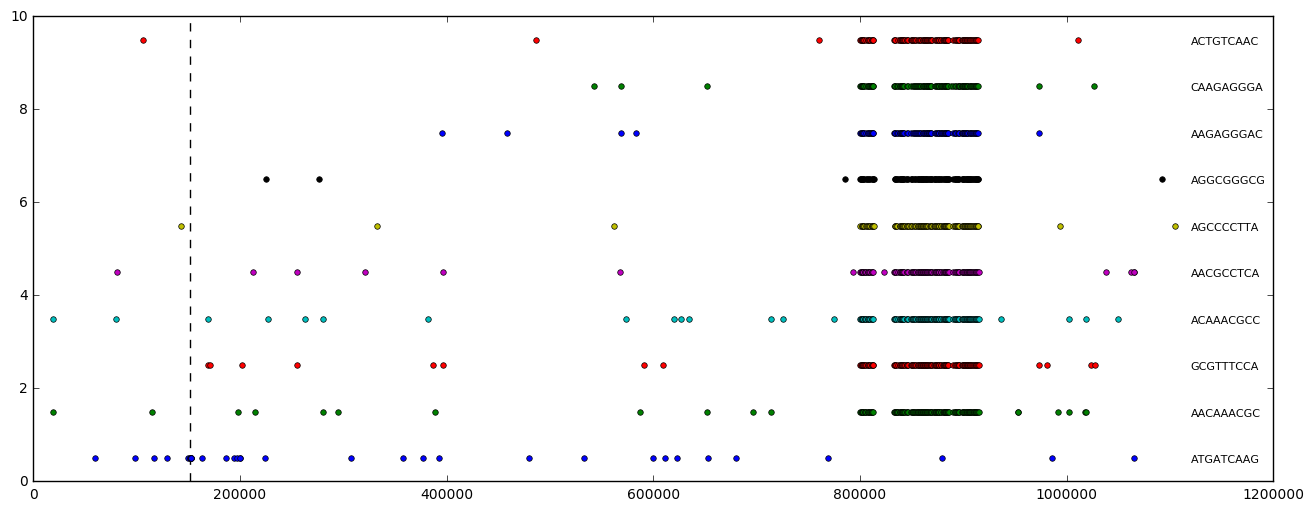

In [72]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(16, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot([OriCStart, OriCStart], [0,10], 'k--')
for n, kmer in enumerate(top10):
    positions = kmers[kmer]
    plt.text(1120000, n+0.4, kmer, fontsize=8)
    plt.plot(positions, [n + 0.5 for i in xrange(len(positions))], 'o', markersize=4.0)
limit = plt.xlim((0,1200000))

<p style="text-align: right; clear: right;">25</p>

# Summary


<img src="http://csbio.unc.edu/mcmillan/Comp555S18/Media/DrawingBoard.jpg" width="300" style="float: right; clear: right; margin: 24px;">

Things have not gone as planned

  * We still don't have a working algorithm for finding *OriC*
  * We tried searching for patterns in a known *OriC* region, but the patterns we found did not generalize to other genomes.
  * We tried to find clumps of repeated k-mers, but that led to too many hypotheses to follow up on

But we won't give up
  * Let's see ***next time*** if there are any more biological insights that we might leverage

<p style="text-align: right; clear: right;">26</p>